# Stock Price Prediction of Coca-Cola Using LSTM and Yahoo Finance Data

## Description:
### This project aims to predict the future closing price of Coca-Cola (KO) stock using a Long Short-Term Memory (LSTM) neural network. The dataset is sourced from Yahoo Finance, and the model is trained on historical stock price data. The project follows a systematic approach, including data collection, preprocessing, feature engineering, model training, evaluation, and forecasting. By leveraging LSTM, a type of recurrent neural network (RNN) designed for time series forecasting, we aim to improve prediction accuracy over traditional methods like ARIMA.

# Useful Libraries


In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import yfinance as yf

plt.style.use('fivethirtyeight')


In [2]:
# Data collection
df = yf.download('KO',start='2012-01-01',end='2019-12-31')

#top 5 records
df.head()

df.index = pd.to_datetime(df.index)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
# number of rows and column in the dataset
df.shape

(2011, 5)

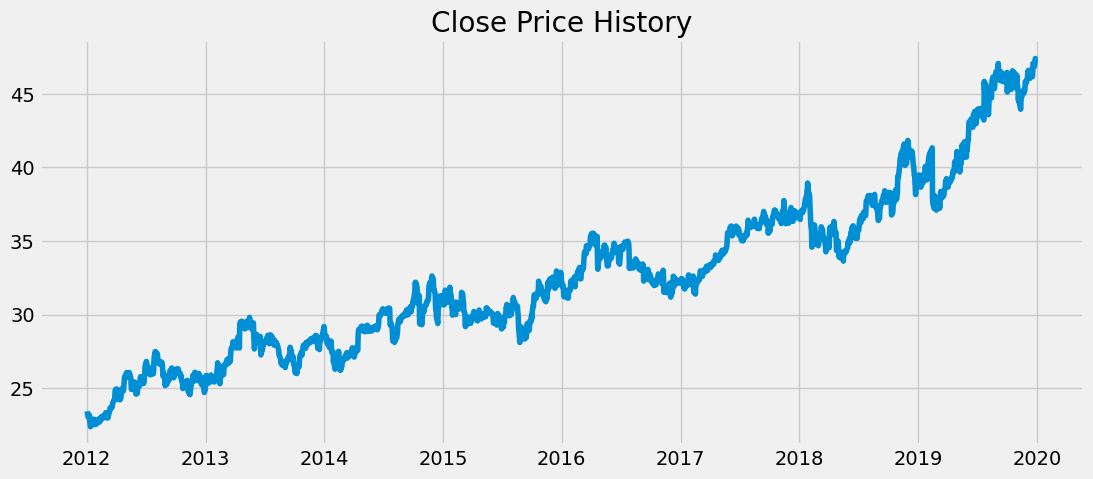

In [4]:
# visualizing the dataset
plt.figure(figsize=(12,5))
plt.plot(df.index,df['Close'],label='Close')
plt.title('Close Price History')
plt.show()

In [5]:
# new dataframe with only close column
data = df['Close']

# converting dataframe to a numpy array
dataset = data.values


In [6]:
# scaling
scaler = MinMaxScaler(feature_range=(0,1))  # normalizing the dataset 
scaled_data = scaler.fit_transform(dataset)
train_data = scaled_data[:round(len(scaled_data)*80/100)]
test_data = scaled_data[round(len(scaled_data)*80/100):]
print(train_data.shape)

(1609, 1)


In [7]:

# creating sequences 
def create_sequences(data, time_steps=60):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])  # Last 60 days as features
        Y.append(data[i+time_steps])  # Next day's close price
    return np.array(X), np.array(Y)

X_train, Y_train = create_sequences(train_data, 60)
X_test, Y_test = create_sequences(test_data, 60)


In [8]:
# Step 5: Define the model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(60, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')



c:\Users\Harshit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Step 6: Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=32)
pred  = model.predict(X_test)



Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0448
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.5863e-04
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.9764e-04
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0052e-04
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.9561e-04
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5021e-04
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0026e-04
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2179e-04
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.3573e-04
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.1619e-04
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9722e-04
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9366e-04
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7430e-04
Epoch 15/50
49/49 ━━━━━━━━━━━━━━━━━━━

In [10]:
# inverse scaling 
pred_actual = scaler.inverse_transform(pred)
Y_test_actual = scaler.inverse_transform(Y_test)


train_size = round(len(df)*80/100)
Y_test_index = df[train_size+60:]

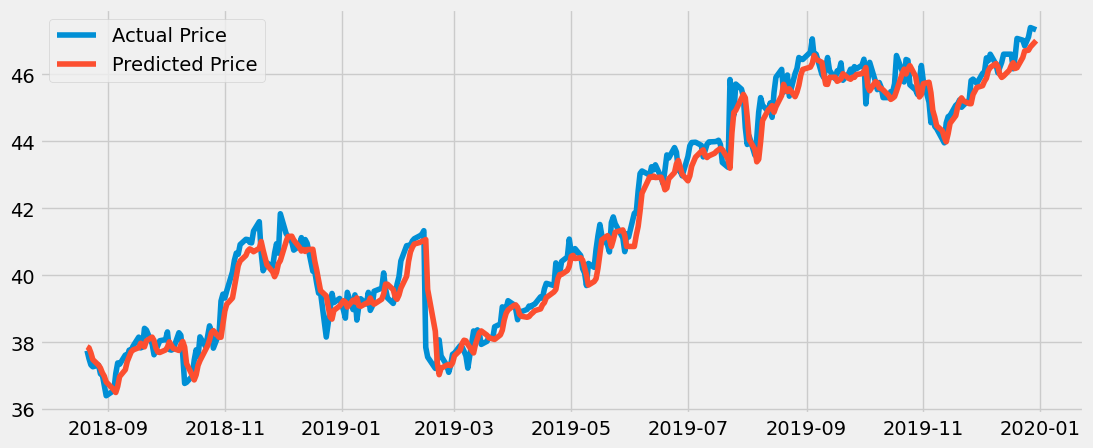

In [11]:
plt.figure(figsize=(12,5))
time_steps = 60
test_dates = df.index[train_size + time_steps:]
plt.plot(test_dates, Y_test_actual,label='Actual Price')
plt.plot(test_dates, pred_actual,label='Predicted Price')
plt.legend()
plt.show()

Live Prediction 

In [ ]:
import schedule
import time

# Function to fetch the latest data and make predictions
def predict_live():
    # Fetch the latest data
    new_data = yf.download('KO', period="1d", interval="1m")
    latest_close = new_data['Close'].values[-1].reshape(-1, 1)
    
    # Update the dataset with the latest closing price
    global data, scaled_data
    data = np.append(data, latest_close, axis=0)
    
    # Preprocess the latest data
    scaled_data = scaler.transform(data)
    
    # Reshape the data for prediction
    latest_data = scaled_data[-60:].reshape(1, 60, 1)
    
    # Predict the next closing price
    predicted_price_scaled = model.predict(latest_data)
    predicted_price = scaler.inverse_transform(predicted_price_scaled)
    
    print(f"Predicted Next Closing Price: {predicted_price[0][0]}")

# Schedule the prediction function to run every minute
schedule.every(1).minutes.do(predict_live)

# Run the scheduler
while True:
    schedule.run_pending()
    time.sleep(1)

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Predicted Next Closing Price: 69.89115905761719


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step



[*********************100%***********************]  1 of 1 completed


Predicted Next Closing Price: 69.46149444580078
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Next Closing Price: 69.22320556640625


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step



[*********************100%***********************]  1 of 1 completed

Predicted Next Closing Price: 69.12970733642578
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Predicted Next Closing Price: 69.13208770751953


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step



[*********************100%***********************]  1 of 1 completed

Predicted Next Closing Price: 69.18898010253906
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Predicted Next Closing Price: 69.26988983154297


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step



[*********************100%***********************]  1 of 1 completed

Predicted Next Closing Price: 69.354736328125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Predicted Next Closing Price: 69.43194580078125


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step



[*********************100%***********************]  1 of 1 completed

Predicted Next Closing Price: 69.49612426757812
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Predicted Next Closing Price: 69.5458984375


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step



[*********************100%***********************]  1 of 1 completed

Predicted Next Closing Price: 69.58222961425781
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Predicted Next Closing Price: 69.60717010498047


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step



[*********************100%***********************]  1 of 1 completed

Predicted Next Closing Price: 69.62313842773438
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Predicted Next Closing Price: 69.63243103027344


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step



[*********************100%***********************]  1 of 1 completed

Predicted Next Closing Price: 69.63697814941406
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Predicted Next Closing Price: 69.63835906982422
